# Overpass Turbo Query for NYC area power features

In [12]:
"""[out:json][timeout:25];
(
  // Nodes, ways, and relations with the "power" key
  node["power"](40.4774,-74.2591,40.9176,-73.7004); // Bounding box for NYC
  way["power"](40.4774,-74.2591,40.9176,-73.7004);
  relation["power"](40.4774,-74.2591,40.9176,-73.7004);
);
out body;
>;
out skel qt;"""

'[out:json][timeout:25];\n(\n  // Nodes, ways, and relations with the "power" key\n  node["power"](40.4774,-74.2591,40.9176,-73.7004); // Bounding box for NYC\n  way["power"](40.4774,-74.2591,40.9176,-73.7004);\n  relation["power"](40.4774,-74.2591,40.9176,-73.7004);\n);\nout body;\n>;\nout skel qt;'

In [1]:
import geopandas as gpd
import sys
import pandas as pd
import requests
pd.options.display.max_rows = 4000

In [2]:
gdf = gpd.read_file("nyc_power.geojson")

In [3]:
df = gdf[["id","name","operator","power","voltage","substation","transformer","generator:method","circuits","wires","area","man_made","height","location","phases","line_management","line_attachment","devices","emergency","foot","geometry"]]

In [4]:
df["geometry"][18886].y

40.8051671

In [5]:
df_simple = df[["id","power","geometry"]]

In [6]:
df_nodes = df_simple[df_simple["id"].str.contains("node")].reset_index()
df_nodes["x"] = [df_nodes["geometry"][i].x for i in range(len(df_nodes))]
df_nodes["y"] = [df_nodes["geometry"][i].y for i in range(len(df_nodes))]
df_nodes = df_nodes.drop("geometry", axis=1)
df_nodes

,index,id,power,x,y
0,3455,node/302151657,tower,-74.110075,40.783746
1,3456,node/302151663,tower,-74.110214,40.781399
2,3457,node/302151666,tower,-74.110350,40.779066
3,3458,node/302151678,tower,-74.110800,40.776424
4,3459,node/302151680,tower,-74.111350,40.774648
...,...,...,...,...,...
15431,18886,node/12306416887,portal,-74.148403,40.805167
15432,18887,node/12398368569,generator,-74.128804,40.602305
15433,18888,node/12438048445,tower,-74.207428,40.644082
15434,18889,node/12445458899,generator,-74.129769,40.602538


In [7]:
df_ways = df_simple[df_simple["id"].str.contains("way")].reset_index()
# df_ways["x"] = [df_ways["geometry"][i].x for i in range(len(df_ways))]
# df_ways["y"] = [df_ways["geometry"][i].y for i in range(len(df_ways))]
df_ways = df_ways.drop("geometry", axis=1)
df_ways

,index,id,power
0,141,way/39836037,plant
1,142,way/39836038,substation
2,143,way/39836042,plant
3,144,way/54618157,substation
4,145,way/65355276,substation
5,146,way/87821749,substation
6,147,way/89903766,generator
7,148,way/94810815,substation
8,149,way/95199038,substation
9,150,way/95200267,substation


# Census API for Block-level Population Data

In [8]:
api_key ='4c5dec4c569a99140b91a7b9294d23b44b7e5379'

In [9]:
url = f"https://api.census.gov/data/2020/dec/pl?get=P1_001N&for=block:*&in=state:36+county:*&key={api_key}"

# Make the GET request
response = requests.get(url)

# Check the response
if response.status_code == 200:
    try:
        # Parse the response JSON
        data = response.json()
        # Display the first few rows
        for row in data[:10]:
            print(row)
    except ValueError as e:
        print("Error decoding JSON:", e)
else:
    print(f"Error: {response.status_code} - {response.text}")

['P1_001N', 'state', 'county', 'tract', 'block']
['0', '36', '061', '012902', '2003']
['35', '36', '063', '024101', '2010']
['7', '36', '063', '024102', '1005']
['0', '36', '065', '022400', '1029']
['88', '36', '065', '022400', '3011']
['214', '36', '065', '022500', '3002']
['19', '36', '065', '025700', '1039']
['31', '36', '065', '025700', '2033']
['20', '36', '065', '024500', '2006']


In [12]:
# Load the shapefile
blocks_gdf = gpd.read_file("tl_2020_36_tabblock20.shp")

# Display the data
print(blocks_gdf.head())

  STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        36        083    051702      1049  360830517021049  Block 1049   
1        36        073    040603      3033  360730406033033  Block 3033   
2        36        017    970501      1061  360179705011061  Block 1061   
3        36        017    970602      3011  360179706023011  Block 3011   
4        36        103    123500      2010  361031235002010  Block 2010   

  MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0   G5040    R   None     None          S    10967         0  +42.8971251   
1   G5040    R   None     None          S   609077         0  +43.2156339   
2   G5040    R   None     None          S  1665166         0  +42.6196815   
3   G5040    R   None     None          S   139161         0  +42.4662627   
4   G5040    U  63217        U          S    13679         0  +40.6868920   

     INTPTLON20  HOUSING20  POP20  \
0  -073.3522719          9     23   
1  -078.3048

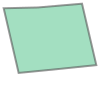

In [16]:
blocks_gdf["geometry"][0]

In [17]:
from shapely.geometry import Point

def assign_population(power_df, block_gdf, mode="block", radius=None):
    """
    Assigns population to power features based on Census block data.

    Parameters:
    - power_df: DataFrame with columns ['id', 'x', 'y'] representing power feature locations.
    - block_gdf: GeoDataFrame with block geometries and population data.
    - mode: "block" assigns population of the block containing the feature; "radius" sums population of blocks within radius.
    - radius: Radius in meters for "radius" mode (ignored for "block" mode).

    Returns:
    - A new DataFrame with an added 'population' column.
    """

    # Convert power features into a GeoDataFrame
    power_gdf = gpd.GeoDataFrame(
        power_df,
        geometry=gpd.points_from_xy(power_df.x, power_df.y),
        crs=block_gdf.crs  # Ensure matching coordinate reference system
    )

    if mode == "block":
        # Spatial join to find the containing block
        joined = gpd.sjoin(power_gdf, block_gdf[['POP20', 'geometry']], how="left", predicate="within")
        power_df['population'] = joined['POP20']

    elif mode == "radius":
        if radius is None:
            raise ValueError("Radius must be specified for 'radius' mode.")

        # Convert meters to CRS units (assumes projected CRS, otherwise use geopy or pyproj for accurate conversion)
        power_gdf = power_gdf.to_crs(epsg=3857)  # Convert to meters-based CRS
        block_gdf = block_gdf.to_crs(epsg=3857)

        # Create buffer zones and find intersecting blocks
        power_gdf['buffer'] = power_gdf.geometry.buffer(radius)
        power_df['population'] = power_gdf['buffer'].apply(
            lambda buf: block_gdf[block_gdf.geometry.intersects(buf)]['POP20'].sum()
            if not block_gdf[block_gdf.geometry.intersects(buf)].empty else float('nan')
        )

    else:
        raise ValueError("Invalid mode. Choose 'block' or 'radius'.")

    return power_df[['id', 'x', 'y', 'population']]

In [22]:
power_df = assign_population(df_nodes, blocks_gdf, mode="block", radius=None)

In [23]:
power_df

,id,x,y,population
0,node/302151657,-74.110075,40.783746,NaN
1,node/302151663,-74.110214,40.781399,NaN
2,node/302151666,-74.110350,40.779066,NaN
3,node/302151678,-74.110800,40.776424,NaN
4,node/302151680,-74.111350,40.774648,NaN
...,...,...,...,...
15431,node/12306416887,-74.148403,40.805167,NaN
15432,node/12398368569,-74.128804,40.602305,79.0
15433,node/12438048445,-74.207428,40.644082,NaN
15434,node/12445458899,-74.129769,40.602538,91.0


C:\Users\Noah\AppData\Local\Temp\ipykernel_19764\2090974842.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_df['size'] = (power_df['population'] / max_pop) * 300  # Scale marker size


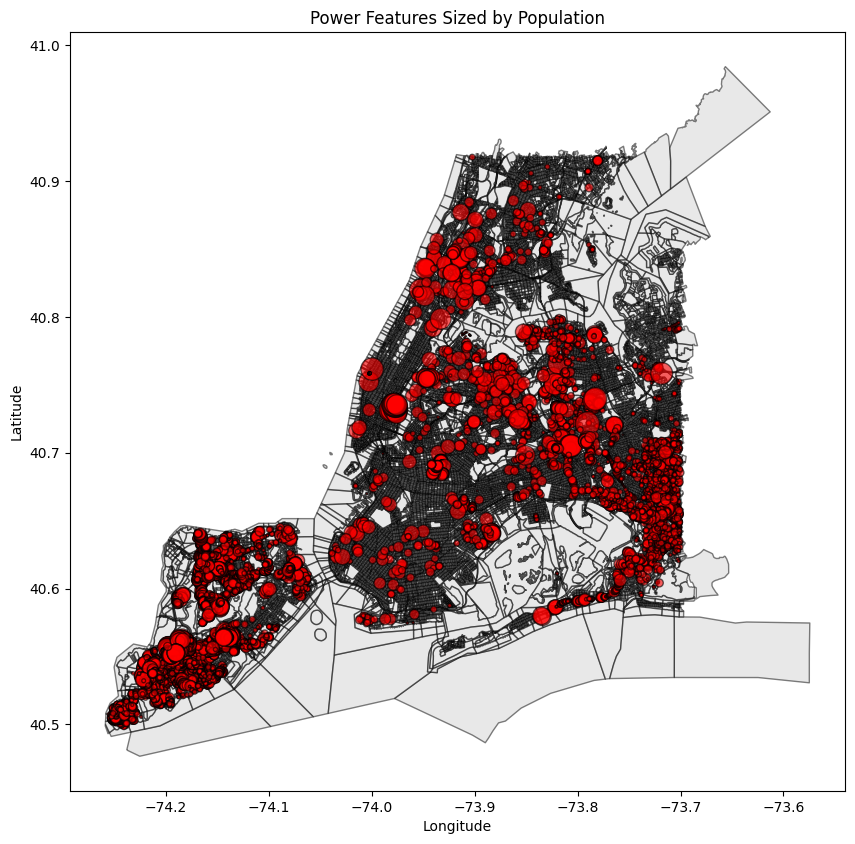

In [27]:
import matplotlib.pyplot as plt

def plot_power_features(power_df, block_gdf):
    fig, ax = plt.subplots(figsize=(10, 10))
    

    # Plot blocks as background
    block_gdf.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

    # Normalize population for marker size
    max_pop = power_df['population'].max()
    power_df['size'] = (power_df['population'] / max_pop) * 300  # Scale marker size

    # Plot power features as proportional circles
    power_df.plot(
        ax=ax, kind="scatter", x="x", y="y", 
        s=power_df['size'], c="red", alpha=0.6, edgecolors="black"
    )

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Power Features Sized by Population")
    plt.show()

# Define min/max bounds of power features
minx, miny, maxx, maxy = power_df["x"].min(), power_df["y"].min(), power_df["x"].max(), power_df["y"].max()

# Filter blocks within this bounding box
nyc_blocks = blocks_gdf.cx[minx:maxx, miny:maxy]

# Call function
plot_power_features(power_df, nyc_blocks)